### Example - Radiative Cooling and Ionisation

Author: Stefano Merlini

Date: 18/04/2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
home = str(Path.home())

sys.path.append(home +'\\OneDrive - Imperial College London\\dev\\')

from MagPy import Cooling
from MagPy import Ionisation

c = ['k', 'deeppink', 'royalblue']
symbol = ['-',':','--']


class cooling_curve_pcc:
    def __init__(self, cooling_curve_per_atom, Z):
        self.cc = cooling_curve_per_atom.model
        self.z = Z.model
    def model(self,Te, ne):
        return 1e-7*ne*self.cc(Te, ne)/self.z(Te, ne)

class cooling_curve_time:
    def __init__(self, cooling_curve_per_atom, Z):
        self.cc = cooling_curve_per_atom.model
        self.z = Z.model
    def model(self, Te, ne):
        z = self.z(Te, ne)
        pc = self.cc(Te, ne)
        return 2.4e-12*(z+1)*Te/pc

### Define Cooling model and Ionisation model for a given element (e.g. W)

In [2]:
w_cooling_model_ss      =  Cooling.IaeaTableMod(74, 'ss')   # ss (nonLTE) model - low temp
w_cooling_model_lte     =  Cooling.IaeaTableMod(74, 'lte')  # lte model - low temp
w_cooling_model_default =  Cooling.IaeaTable(74)            # default tabled value FLYCHK

W_Zbar_ss        =  Ionisation.IaeaTableMod(74, 'ss')
W_Zbar_lte       =  Ionisation.IaeaTableMod(74, 'lte')
W_Zbar_default   =  Ionisation.IaeaTable(74)

### Generate cooling and ionization curves for a given value of Te and n_e

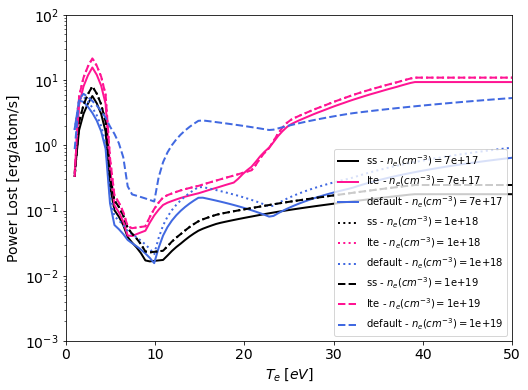

In [3]:
fig, ax = plt.subplots(figsize = (8,6))

Te  =   np.linspace(1, 50, 100)    # eV

for i, ne in enumerate([0.7e18, 1e18, 1e19]):
    w_cc_ss                  =  w_cooling_model_ss.model(Te, ne)
    w_cc_lte                 =  w_cooling_model_lte.model(Te, ne)
    w_cc_default             =  w_cooling_model_default.model(Te, ne)
    
    tn = '$n_e (cm^{-3}) = $' + str(ne)

    ax.semilogy(Te, w_cc_ss, c=c[0], lw=2, ls=symbol[i], label = 'ss - ' + tn)
    ax.semilogy(Te, w_cc_lte, c=c[1], lw=2, ls=symbol[i], label = 'lte - ' + tn)
    ax.semilogy(Te, w_cc_default, c=c[2], lw=2, ls=symbol[i], label = 'default - ' + tn)

    ax.set_xlim(0,50)
    ax.set_ylim(1e-3,100)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel('$T_e \; [eV]$', size = 14)
    ax.set_ylabel(r'Power Lost [erg/atom/s]', size = 14)
    ax.legend(loc = 4)

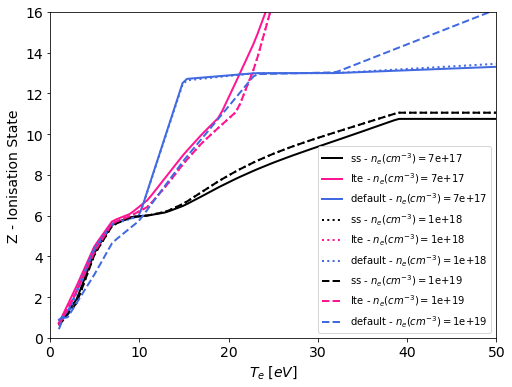

In [4]:
fig, ax = plt.subplots(figsize = (8,6))

Te  =   np.linspace(1, 50, 100)    # eV

for i, ne in enumerate([0.7e18, 1e18, 1e19]):
    tn = '$n_e (cm^{-3}) = $' + str(ne)
    ax.plot(Te, W_Zbar_ss.model(Te, ne), c=c[0], lw=2, ls=symbol[i], label='ss - '+tn)
    ax.plot(Te, W_Zbar_lte.model(Te, ne), c=c[1], lw=2, ls=symbol[i], label='lte - '+tn)
    ax.plot(Te, W_Zbar_default.model(Te, ne), c=c[2], lw=2, ls=symbol[i], label='default - ' +tn)

    ax.set_xlim(0, 50)
    ax.set_ylim(0, 16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=14)

    ax.set_xlabel('$T_e \; [eV]$', size = 14)
    ax.set_ylabel(r'Z - Ionisation State', size = 14)
    ax.legend(loc=4)